In [1]:
from PIL import Image
import os
import matplotlib.pyplot as plt
import pandas as pd
import glob

In [2]:
def get_mask_path(tile_x, tile_y, mask_type):
    path = f"./data/sentinel-2a-tile-{tile_x}x-{tile_y}y/masks/{mask_type}-mask.png"
    return path

In [3]:
def load_image(tile_path):
    img = Image.open(tile_path)
    return img

In [4]:
def get_tile_pixels(img):
    pixels = img.load()
    return pixels

In [5]:
def plot_image(img):
    plt.imshow(img)

In [6]:
def is_in_mask(mask_pixels, pixel_x, pixel_y):
    if mask_pixels[pixel_y, pixel_x] == (0, 0, 0, 255):
        return True
    else:
        return False

In [7]:
def pixels_in_mask(tile_x, tile_y,mask_type):
    pixel_list = []
    
    mask_path = get_mask_path(tile_x, tile_y, mask_type)    
    mask_img = load_image(mask_path)    
    mask_pix = get_tile_pixels(mask_img)    
    mask_img_size = mask_img.size
    
    for pixel_x in range(0,mask_img.size[0]):
        for pixel_y in range(0,mask_img.size[1]):
            in_mask = is_in_mask(mask_pix, pixel_x, pixel_y)
            if in_mask:
                pixel_list.append([pixel_x,pixel_y])
    return pixel_list

In [8]:
def get_timeseries_image_paths(tile_x, tile_y, band):
    path = f"./data/sentinel-2a-tile-{tile_x}x-{tile_y}y/timeseries/{tile_x}-{tile_y}-{band}*.png"
    images = glob.glob(path)
    return images

In [9]:
def get_dates(timeseries_paths_list,band):
    dates = []
    for path in paths:
        dates.append((path.split(sep = {band})[1]).split(sep = ".")[0])
    return dates

In [10]:
mask = load_image('./data/sentinel-2a-tile-7680x-10240y/masks/sugarcane-region-mask.png')

In [11]:
pixels = get_tile_pixels(mask)

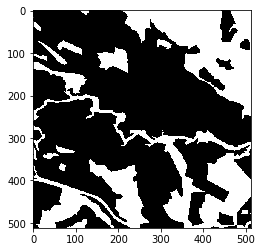

In [12]:
plot_image(mask)

In [13]:
mask.size

(512, 512)

In [14]:
is_in_mask(pixels, 511, 511)

True

In [15]:
mask_pixels = pixels_in_mask(7680, 10240,"sugarcane-region")

In [16]:
# Pixel values that are actually sugarcane fields
mask_pixels

[[0, 0],
 [0, 1],
 [0, 2],
 [0, 3],
 [0, 4],
 [0, 5],
 [0, 6],
 [0, 7],
 [0, 8],
 [0, 9],
 [0, 10],
 [0, 11],
 [0, 12],
 [0, 13],
 [0, 14],
 [0, 15],
 [0, 16],
 [0, 17],
 [0, 18],
 [0, 19],
 [0, 20],
 [0, 21],
 [0, 22],
 [0, 23],
 [0, 24],
 [0, 25],
 [0, 26],
 [0, 27],
 [0, 28],
 [0, 29],
 [0, 30],
 [0, 31],
 [0, 32],
 [0, 33],
 [0, 34],
 [0, 35],
 [0, 36],
 [0, 37],
 [0, 38],
 [0, 39],
 [0, 40],
 [0, 41],
 [0, 42],
 [0, 43],
 [0, 44],
 [0, 45],
 [0, 46],
 [0, 47],
 [0, 48],
 [0, 49],
 [0, 50],
 [0, 51],
 [0, 52],
 [0, 53],
 [0, 54],
 [0, 55],
 [0, 56],
 [0, 57],
 [0, 58],
 [0, 59],
 [0, 60],
 [0, 61],
 [0, 62],
 [0, 63],
 [0, 64],
 [0, 65],
 [0, 66],
 [0, 67],
 [0, 68],
 [0, 69],
 [0, 70],
 [0, 71],
 [0, 72],
 [0, 73],
 [0, 74],
 [0, 75],
 [0, 76],
 [0, 77],
 [0, 78],
 [0, 79],
 [0, 80],
 [0, 81],
 [0, 82],
 [0, 83],
 [0, 84],
 [0, 85],
 [0, 86],
 [0, 87],
 [0, 88],
 [0, 89],
 [0, 90],
 [0, 91],
 [0, 92],
 [0, 93],
 [0, 94],
 [0, 95],
 [0, 96],
 [0, 97],
 [0, 98],
 [0, 99],
 [0, 100],

In [17]:
pixel_df = pd.DataFrame()

In [18]:
index = 0
for x in range(0,512):
    for y in range(0,512):
        pixel_df.loc[index,"x"] = x
        pixel_df.loc[index,"y"] = y
        if [x,y] in mask_pixels:
            pixel_df.loc[index,"sugarcane"] = True
        else:
            pixel_df.loc[index,"sugarcane"] = False
        index = index + 1

In [19]:
pixel_df.sample(10)

,x,y,sugarcane
166434,325.0,34.0,True
125247,244.0,319.0,True
197756,386.0,124.0,True
133391,260.0,271.0,True
106614,208.0,118.0,False
60868,118.0,452.0,False
132507,258.0,411.0,True
107559,210.0,39.0,True
26668,52.0,44.0,True
94392,184.0,184.0,True
